In [1]:
%%time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

Wall time: 5.4 s


In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#### majority of cabin column are null values, we can drop it and also the name of the person does not have to
#### do anything with the survial, hence dropping both the columns
data.drop(columns = ['Cabin','Name','Ticket','Embarked','PassengerId','Parch','SibSp'],inplace = True)
test.drop(columns = ['Cabin','Name','Ticket','Embarked','PassengerId','Parch','SibSp'],inplace = True)

In [10]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [11]:
test.isna().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [12]:
#age has 177 null values we have to some how impute them
# as seen from describe the standard deviation from mean is 14.5, not much of a variation hence replacing them with mean of age column
data['Age'] = data.Age.fillna(data.Age.mean())
test['Age'] = test.Age.fillna(test.Age.mean())

In [13]:
###encoding sex column values

data['Sex'] = data['Sex'].map(lambda x : 0 if x == 'female' else 1)
test['Sex'] = test['Sex'].map(lambda x : 0 if x == 'female' else 1)

In [14]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [15]:
### checking if the columns have low variances
for col in [ 'Survived', 'Pclass', 'Sex', 'Age', 'Fare']:
    print(col,data[col].var(),sep = '        ')

Survived        0.2367722165474984
Pclass        0.6990151199889065
Sex        0.22847450787525722
Age        169.05239993721085
Fare        2469.436845743117


In [16]:
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


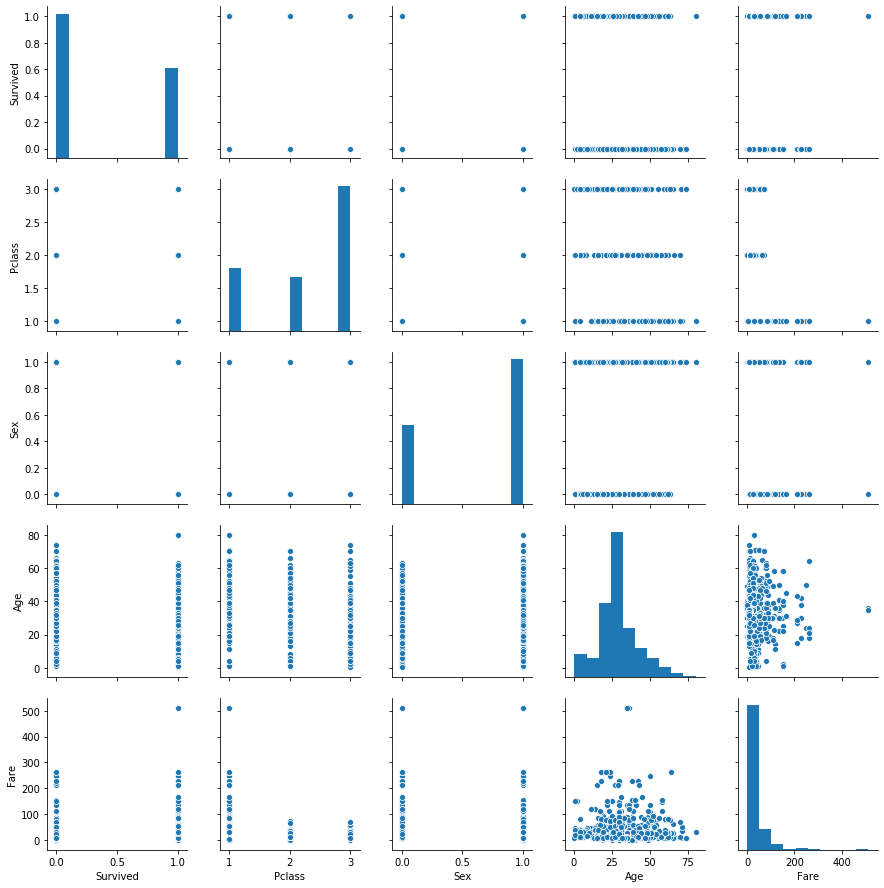

In [17]:
sns.pairplot(data[data.columns])
plt.show()

In [18]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Applying Random Forest

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(data.drop(columns = 'Survived'),data.Survived)

In [20]:
rf = RandomForestClassifier(n_estimators = 50,n_jobs = 3)

In [21]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=3,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [22]:
rf.score(X_train,Y_train)

0.9775449101796407

In [23]:
rf.score(X_test,Y_test)

0.8654708520179372

In [24]:
y_pred = rf.predict(X_test)

In [25]:
pd.DataFrame(confusion_matrix(y_pred = y_pred,y_true = Y_test),index = ['Actual 1','Actual 0'],columns = ['Predicted 1','Predcited 0'])

,Predicted 1,Predcited 0
Actual 1,139,16
Actual 0,14,54


### the classes are imbalanced let's balance the classes

In [26]:
sampler = RandomOverSampler()

In [27]:
feature_s,target_s = sampler.fit_sample(data.drop(columns = 'Survived'),data.Survived)

In [28]:
pd.Series(target_s).value_counts()

1    549
0    549
dtype: int64

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(feature_s,target_s)
rf = RandomForestClassifier(n_estimators = 50,n_jobs = 3)
rf.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=3,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [30]:
print('Train_Acc :', rf.score(X_train,Y_train))
print('Test_Acc :', rf.score(X_test,Y_test))

Train_Acc : 0.9842041312272175
Test_Acc : 0.8218181818181818


In [31]:
y_pred = rf.predict(X_test)
pd.DataFrame(confusion_matrix(y_pred = y_pred,y_true = Y_test),index = ['Actual 1','Actual 0'],columns = ['Predicted 1','Predcited 0'])

,Predicted 1,Predcited 0
Actual 1,100,26
Actual 0,23,126


In [32]:
rf.feature_importances_

array([0.08642512, 0.28713144, 0.3006514 , 0.32579204])

#### using hyper parameters to find the best count of estimators

In [33]:
rf = RandomForestClassifier()

In [34]:
gs = GridSearchCV(rf,param_grid = {'n_estimators':[10,20,50,100,200,300,500],'max_depth':[10,20,30,None]},cv =5,n_jobs=4)

In [35]:
gs.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [36]:
gs.best_params_

{'max_depth': 30, 'n_estimators': 500}

In [37]:
gs.best_score_

0.8578371810449574

In [38]:
gs.best_estimator_.score(X_test, Y_test)

0.8290909090909091

### Best Random Forest Model

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(feature_s,target_s)
rf = RandomForestClassifier(n_estimators = 100,max_depth = 20 ,n_jobs = 3)
rf.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [40]:
print('Train_Acc :', rf.score(X_train,Y_train))
print('Test_Acc :', rf.score(X_test,Y_test))

Train_Acc : 0.9817739975698664
Test_Acc : 0.8654545454545455


In [41]:
y_pred = rf.predict(X_test)
pd.DataFrame(confusion_matrix(y_pred = y_pred,y_true = Y_test),index = ['Actual 1','Actual 0'],columns = ['Predicted 1','Predcited 0'])

,Predicted 1,Predcited 0
Actual 1,116,20
Actual 0,17,122


### applying Decision tree algorithm

In [42]:
dt =  DecisionTreeClassifier()

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(feature_s,target_s)
dt =  DecisionTreeClassifier()
dt.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
dt.feature_importances_

array([0.09772636, 0.30711422, 0.2992214 , 0.29593802])

In [45]:
print('Train_Acc :', dt.score(X_train,Y_train))
print('Test_Acc :', dt.score(X_test,Y_test))

Train_Acc : 0.9805589307411907
Test_Acc : 0.8254545454545454


In [46]:
y_pred = dt.predict(X_test)
pd.DataFrame(confusion_matrix(y_pred = y_pred,y_true = Y_test),index = ['Actual 1','Actual 0'],columns = ['Predicted 1','Predcited 0'])

,Predicted 1,Predcited 0
Actual 1,106,24
Actual 0,24,121


#### using hyper parameters to find maximun deapth 

In [47]:
dt =  DecisionTreeClassifier()

In [48]:
gs = GridSearchCV(dt,param_grid = {'max_depth':[10,20,30,40,50,None]},cv =5,n_jobs=4)

In [49]:
gs.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=4,
             param_grid={'max_depth': [10, 20, 30, 40, 50, None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fal

In [50]:
gs.best_score_

0.8238153098420413

In [51]:
gs.best_estimator_.score(X_test, Y_test)

0.8218181818181818

In [52]:
gs.best_params_

{'max_depth': 30}

### Best Decision Tree Model

In [53]:
dt =  DecisionTreeClassifier()

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(feature_s,target_s)
dt =  DecisionTreeClassifier(max_depth = 10)
dt.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [55]:
dt.feature_importances_

array([0.1339984 , 0.37951379, 0.23907111, 0.2474167 ])

In [56]:
print('Train_Acc :', dt.score(X_train,Y_train))
print('Test_Acc :', dt.score(X_test,Y_test))

Train_Acc : 0.9416767922235723
Test_Acc : 0.8072727272727273


In [57]:
y_pred = dt.predict(X_test)
pd.DataFrame(confusion_matrix(y_pred = y_pred,y_true = Y_test),index = ['Actual 1','Actual 0'],columns = ['Predicted 1','Predcited 0'])

,Predicted 1,Predcited 0
Actual 1,115,23
Actual 0,30,107


### now let's use LogisticRegression

In [58]:
lr = LogisticRegression(penalty = 'l2')

In [59]:
lr.fit(feature_s,target_s)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
lr.score(X_train,Y_train)

0.7849331713244229

In [61]:
lr.score(X_test,Y_test)

0.7709090909090909

In [62]:
y_pred = lr.predict(X_test)
pd.DataFrame(confusion_matrix(y_pred = y_pred,y_true = Y_test),index = ['Actual 1','Actual 0'],columns = ['Predicted 1','Predcited 0'])

,Predicted 1,Predcited 0
Actual 1,111,27
Actual 0,36,101


### identifying if the degree of polynomial is impacting the result

In [63]:
for deg in range(1,5):
    pol = PolynomialFeatures(degree = deg)
    feature_n = pol.fit_transform(feature_s)
    X_train_n,X_test_n,Y_train_n,Y_test_n = train_test_split(feature_n,target_s)
    lr = LogisticRegression()
    lr.fit(X_train_n,Y_train_n)
    print('degree :',deg,'Train_Acc :',lr.score(X_train_n,Y_train_n))
    print('degree :',deg,'Test_Acc :',lr.score(X_test_n,Y_test_n))
    print('----------')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


degree : 1 Train_Acc : 0.7776427703523694
degree : 1 Test_Acc : 0.8072727272727273
----------
degree : 2 Train_Acc : 0.7995139732685298
degree : 2 Test_Acc : 0.8072727272727273
----------
degree : 3 Train_Acc : 0.7679222357229648
degree : 3 Test_Acc : 0.7163636363636363
----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


degree : 4 Train_Acc : 0.68408262454435
degree : 4 Test_Acc : 0.6290909090909091
----------


deg 1 is better compared to all other degree

#### RANDOM FOREST         
* Train_Acc : 0.98
* Test_Acc : 0.86
#### DECISION TREE
* Train_Acc : 0.92
* Test_Acc : 0.82    
#### LOGISTIC REGRESSION
* Train_Acc : 0.79
* Test_Acc : 0.79

Decision Tree is the best model for now, using it to predict the test file

In [64]:
test.isna().sum()

Pclass    0
Sex       0
Age       0
Fare      1
dtype: int64

In [65]:
test.Fare.fillna(test.Fare.mean(),inplace = True)

In [66]:
test.isna().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [67]:
dt.predict(test)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Kneighbors classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knc = KNeighborsClassifier(n_neighbors=9)

In [84]:
knc.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [85]:
knc.score(X_test,Y_test)

0.7454545454545455

In [91]:
knc.score(X_train,Y_train)

0.7654921020656136

## NaiveBayes

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
Gnb = GaussianNB()

In [88]:
Gnb.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [90]:
Gnb.score(X_train,Y_train)

0.7606318347509113

In [89]:
Gnb.score(X_test,Y_test)

0.7636363636363637